In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
font_path='./drive/MyDrive/L1/Notebooks/dataset/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False

# 시즌별 총 매출, 편차, 변동율

In [ ]:
sales=pd.DataFrame({'14':[81496143734,75140135504,90015263642],
                '15':[88992685655,76254203955,94150226683]},index=['SPRING','SUMMER','FALL'])
sales['DELTA']=sales['15']-sales['14']
sales['DELTA_RATIO']=round((sales.DELTA/sales['14'])*100,2)
sales

,14,15,DELTA,DELTA_RATIO
SPRING,81496143734,88992685655,7496541921,9.20
SUMMER,75140135504,76254203955,1114068451,1.48
FALL,90015263642,94150226683,4134963041,4.59


# 총 고객수, 구매감소고객수, 구매감소고객비율

In [ ]:
df=pd.DataFrame({'총고객수':[19123,19188,19241],
                '구매감소고객수':[8353,9177,9543]},index=['Spring','Summer','Fall'])
df['구매감소고객비율']=round(((df['구매감소고객수']/df['총고객수'])*100),2)
df.to_pickle('decreased_customer.pkl')
df

,총고객수,구매감소고객수,구매감소고객비율
Spring,19123,8353,43.68
Summer,19188,9177,47.83
Fall,19241,9543,49.60


# 시즌별 구매감소고객 수

Text(0.5, 0, 'season')

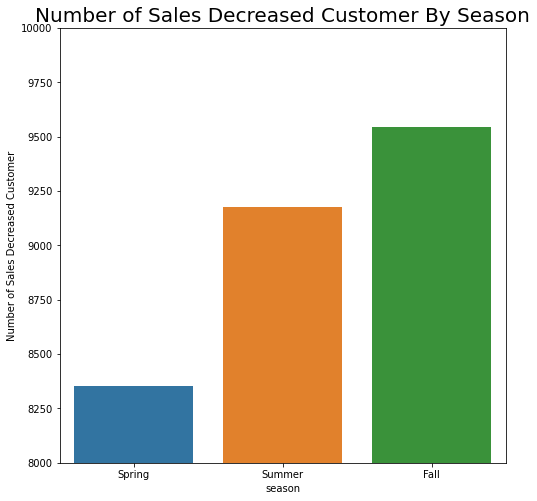

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.barplot(x=df.index,y=df.구매감소고객수,data=df)
plt.ylim(8000,10000)
plt.title('Number of Sales Decreased Customer By Season',fontsize=20)
plt.ylabel('Number of Sales Decreased Customer')
plt.xlabel('season')

# 시즌별 구매감소고객비율

Text(0.5, 0, 'season')

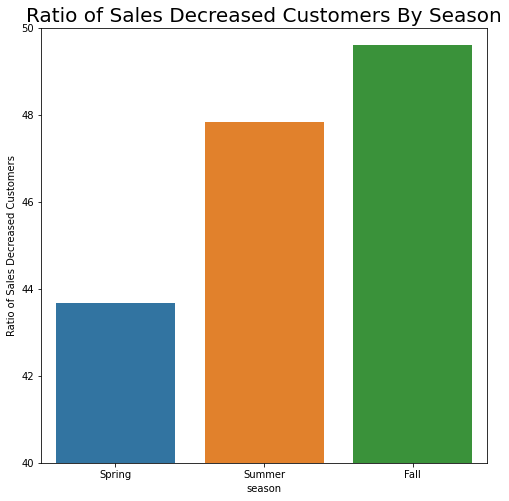

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.barplot(x=df.index,y=df.구매감소고객비율,data=df)
plt.ylim(40,50)
plt.title('Ratio of Sales Decreased Customers By Season',fontsize=20)
plt.ylabel('Ratio of Sales Decreased Customers')
plt.xlabel('season')

# 구매 감소 고객 수 변동

In [ ]:
s_d_cus_df=pd.DataFrame([9046,9786,7601,10738,9449,10227,9272],columns=['sales_decreased_customer'],
                        index=['Q1-Q2','Q2-Q3','Q3-Q4','Q4-Q5','Q5-Q6','Q6-Q7','Q7-Q8'])
s_d_cus_df

,sales_decreased_customer
Q1-Q2,9046
Q2-Q3,9786
Q3-Q4,7601
Q4-Q5,10738
Q5-Q6,9449
Q6-Q7,10227
Q7-Q8,9272


Text(0, 0.5, 'number of sales decreased customers')

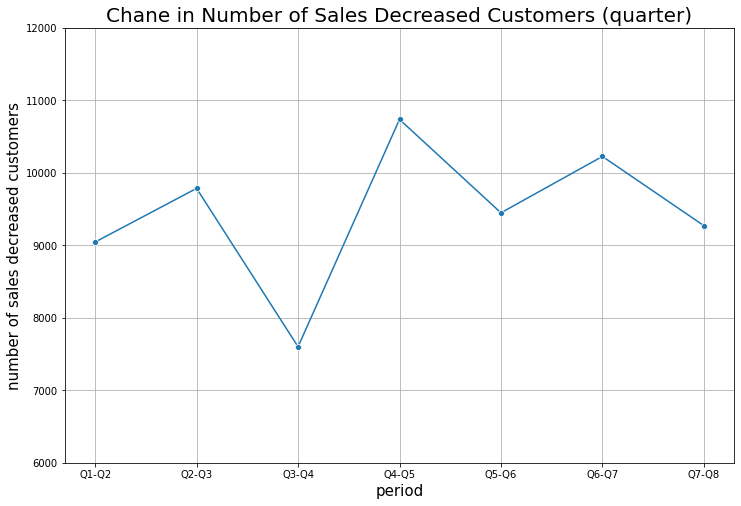

In [ ]:
fig1=plt.figure(figsize=(12,8))
sns.lineplot(x=s_d_cus_df.index,y=s_d_cus_df.sales_decreased_customer,marker='o')
plt.grid()
plt.ylim(6000,12000)
plt.title('Chane in Number of Sales Decreased Customers (quarter)',fontsize=20)
plt.xlabel('period',fontsize=15)
plt.ylabel('number of sales decreased customers',fontsize=15)

# 구매 감소 고객 비율

In [ ]:
t_cus_q=pd.DataFrame([19054,19139,19212,19268,19292,19306,19305],index=['Q1-Q2','Q2-Q3','Q3-Q4','Q4-Q5','Q5-Q6','Q6-Q7','Q7-Q8'],columns=['total_customer_q'])

In [ ]:
sales=pd.concat([s_d_cus_df,t_cus_q],axis=1)

In [ ]:
sales['ratio']=(sales['sales_decreased_customer']/sales['total_customer_q'])

In [ ]:
sales

,sales_decreased_customer,total_customer_q,ratio
Q1-Q2,9046,19054,0.474756
Q2-Q3,9786,19139,0.511312
Q3-Q4,7601,19212,0.395638
Q4-Q5,10738,19268,0.557297
Q5-Q6,9449,19292,0.489789
Q6-Q7,10227,19306,0.529732
Q7-Q8,9272,19305,0.480290


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'period')

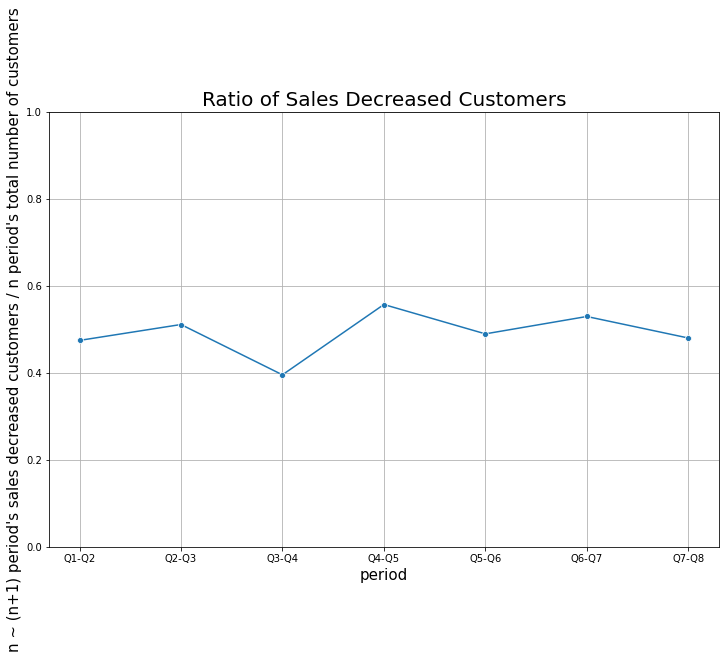

In [ ]:
fig1=plt.figure(figsize=(12,8))
sns.lineplot(sales.index,sales.ratio,marker='o')
plt.grid()
plt.ylim(0,1)
plt.title('Ratio of Sales Decreased Customers',fontsize=20)
plt.ylabel('n ~ (n+1) period\'s sales decreased customers / n period\'s total number of customers',fontsize=15)
plt.xlabel('period',fontsize=15)

# 월별 총 매출액 추이

In [ ]:
pm=pd.read_pickle('./drive/MyDrive/L1/Notebooks/dataset/purchamount_month.pkl')
pm

,MONTH,PURCHAMOUNT
0,1,28249481923
1,2,22817825296
2,3,26627455524
3,4,26412673959
4,5,28456014251
5,6,25677279187
6,7,24578376885
7,8,24884479432
8,9,25486858340
9,10,30603047718


([<matplotlib.axis.XTick at 0x7fe599621f10>,
 [Text(0, 0, ''),
  Text(0, 0, '14-1'),
  Text(0, 0, ''),
  Text(0, 0, '14-3'),
  Text(0, 0, ''),
  Text(0, 0, '14-5'),
  Text(0, 0, ''),
  Text(0, 0, '14-7'),
  Text(0, 0, ''),
  Text(0, 0, '14-9'),
  Text(0, 0, ''),
  Text(0, 0, '14-11'),
  Text(0, 0, ''),
  Text(0, 0, '15-1'),
  Text(0, 0, ''),
  Text(0, 0, '15-3'),
  Text(0, 0, ''),
  Text(0, 0, '15-5'),
  Text(0, 0, ''),
  Text(0, 0, '15-7'),
  Text(0, 0, ''),
  Text(0, 0, '15-9'),
  Text(0, 0, ''),
  Text(0, 0, '15-11'),
  Text(0, 0, ''),
  Text(0, 0, '')])

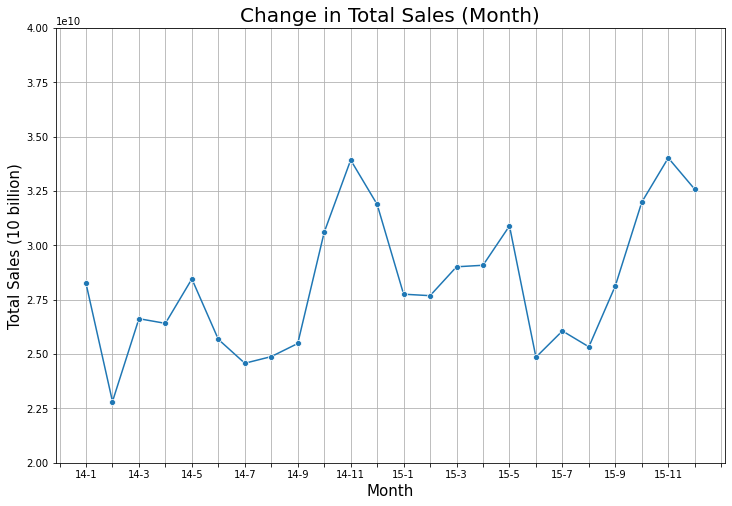

In [ ]:
fig1=plt.figure(figsize=(12,8))
sns.lineplot(x=pm.MONTH,y=pm.PURCHAMOUNT,data=pm,marker='o')
plt.grid()
plt.title('Change in Total Sales (Month)',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Sales (10 billion)',fontsize=15)
plt.ylim(20000000000,40000000000)
plt.xticks(np.arange(0,26,1),labels=['','14-1','','14-3','','14-5','','14-7','','14-9','','14-11','',
                                    '15-1','','15-3','','15-5','','15-7','','15-9','','15-11','',''])

# 월별 총 고객수 변동

In [ ]:
cnm=pd.read_pickle('./drive/MyDrive/L1/Notebooks/dataset/custno_month.pkl')
cnm

,MONTH,CUSTNO
0,1,18741
1,2,18691
2,3,18810
3,4,18910
4,5,18991
5,6,18981
6,7,19024
7,8,19055
8,9,19089
9,10,19144


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7fe599999950>,
 [Text(0, 0, ''),
  Text(0, 0, '14-1'),
  Text(0, 0, ''),
  Text(0, 0, '14-3'),
  Text(0, 0, ''),
  Text(0, 0, '14-5'),
  Text(0, 0, ''),
  Text(0, 0, '14-7'),
  Text(0, 0, ''),
  Text(0, 0, '14-9'),
  Text(0, 0, ''),
  Text(0, 0, '14-11'),
  Text(0, 0, ''),
  Text(0, 0, '15-1'),
  Text(0, 0, ''),
  Text(0, 0, '15-3'),
  Text(0, 0, ''),
  Text(0, 0, '15-5'),
  Text(0, 0, ''),
  Text(0, 0, '15-7'),
  Text(0, 0, ''),
  Text(0, 0, '15-9'),
  Text(0, 0, ''),
  Text(0, 0, '15-11'),
  Text(0, 0, ''),
  Text(0, 0, '')])

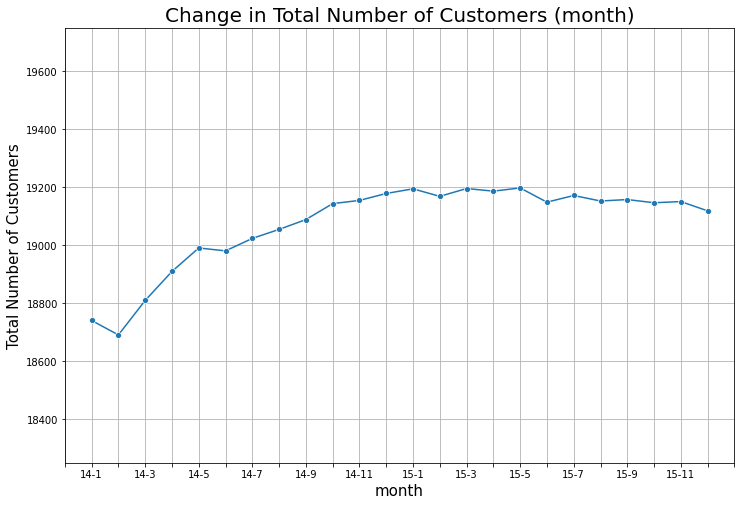

In [ ]:
fig1=plt.figure(figsize=(12,8))
sns.lineplot(cnm.MONTH,cnm.CUSTNO,marker='o')
plt.grid()
plt.title('Change in Total Number of Customers (month)',fontsize=20)
plt.xlabel('month',fontsize=15)
plt.ylabel('Total Number of Customers',fontsize=15)
plt.xlim(0,25)
plt.ylim(18250,19750)
plt.xticks(np.arange(0,26,1),labels=['','14-1','','14-3','','14-5','','14-7','','14-9','','14-11','',
                                    '15-1','','15-3','','15-5','','15-7','','15-9','','15-11','',''])